In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV


In [4]:
# Load the dataset
FILEPATH = r'property_data.xlsx'
df = pd.read_excel(FILEPATH, sheet_name='Sheet1')

df['ZIP_CODE'] = df['ZIP_CODE'].astype(str).str.zfill(5)
df['YR_BUILT'] = df['YR_BUILT'].fillna(0).astype(int)
df['YR_REMODEL'] = df['YR_REMODEL'].fillna(0).astype(int)
df[['INT_COND', 'EXT_COND', 'OVERALL_COND']] = df[['INT_COND', 'EXT_COND', 'OVERALL_COND']].apply(lambda x: x.astype('category'))
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)

print('Data cleaning steps completed.')
print('Sample data after cleaning:')

# Drop rows with missing values
df.dropna(inplace=True)


print(df.head())

Data cleaning steps completed.
Sample data after cleaning:
        ST_NAME         CITY ZIP_CODE  LAND_SF  GROSS_AREA  LIVING_AREA  \
0     PUTNAM ST  EAST BOSTON   2128.0   1150.0      3353.0       2202.0   
1  Lexington ST  EAST BOSTON   2128.0   1150.0      3299.0       2307.0   
2  Lexington ST  EAST BOSTON   2128.0   1150.0      3392.0       2268.0   
3  Lexington ST  EAST BOSTON   2128.0   1150.0      3108.0       2028.0   
4  Lexington ST  EAST BOSTON   2128.0   2010.0      3700.0       2546.0   

   LAND_VALUE  BLDG_VALUE  TOTAL_VALUE  GROSS_TAX  YR_BUILT  YR_REMODEL  \
0    195700.0      588500       784200  8422.3072      1900           0   
1    196500.0      615300       811800  8718.7272      1920        2000   
2    197100.0      599200       796300  8552.2600      1905        1985   
3    197700.0      530200       727900  7817.6500      1900        1991   
4    225700.0      569100       794800  8536.1472      1900        1978   

      INT_COND     EXT_COND OVERALL_CON

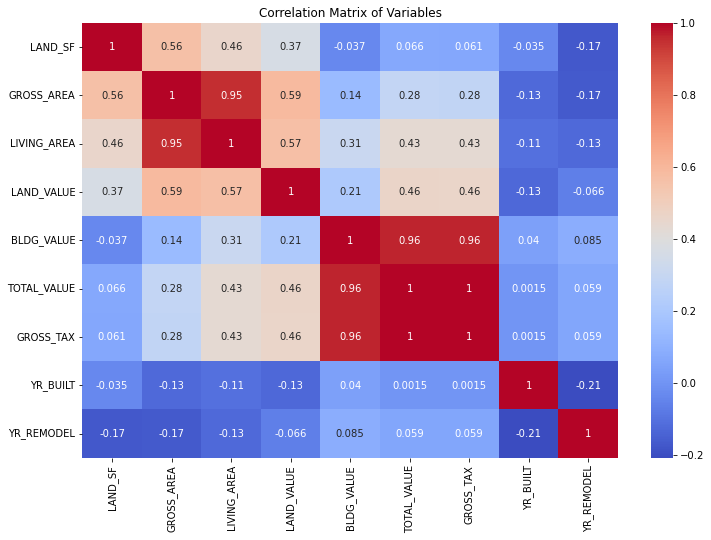

In [5]:
# Correlation Matrix
plt.figure(figsize=(12, 8), facecolor='white')
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

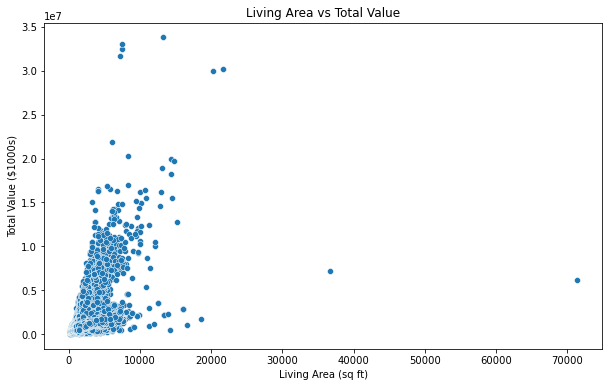

In [6]:
# Scatter plot of Living Area vs Total Value
plt.figure(figsize=(10, 6), facecolor='white')
sns.scatterplot(x='LIVING_AREA', y='TOTAL_VALUE', data=df)
plt.title('Living Area vs Total Value')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Total Value ($1000s)')
plt.show()

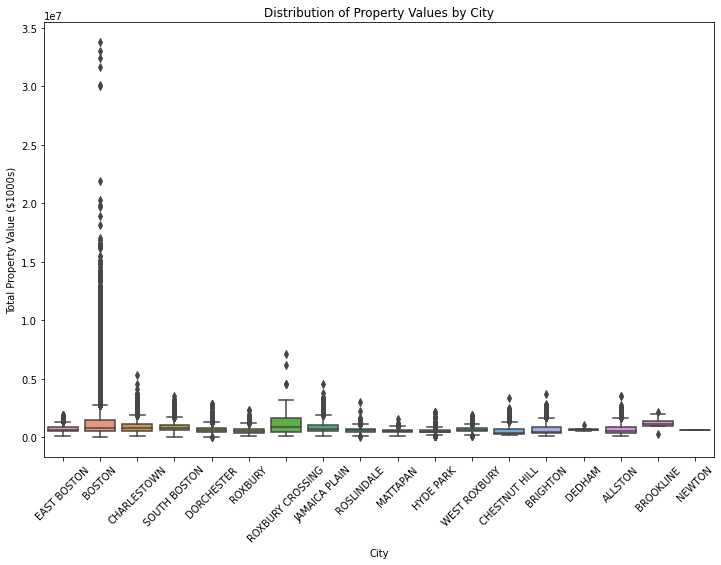

In [7]:
# Distribution of Property Values by City
plt.figure(figsize=(12, 8), facecolor='white')
sns.boxplot(x='CITY', y='TOTAL_VALUE', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Property Values by City')
plt.xlabel('City')
plt.ylabel('Total Property Value ($1000s)')
plt.show()

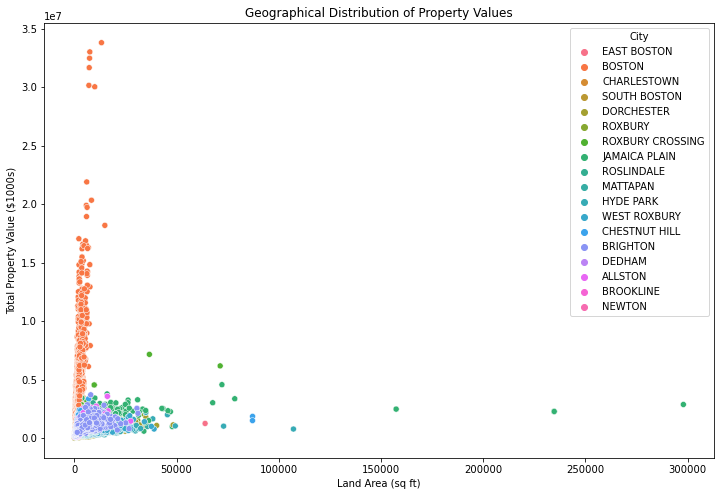

In [8]:
# Geographical Distribution of Property Values
plt.figure(figsize=(12, 8), facecolor='white')
sns.scatterplot(x='LAND_SF', y='TOTAL_VALUE', hue='CITY', data=df)
plt.title('Geographical Distribution of Property Values')
plt.xlabel('Land Area (sq ft)')
plt.ylabel('Total Property Value ($1000s)')
plt.legend(title='City')
plt.show()

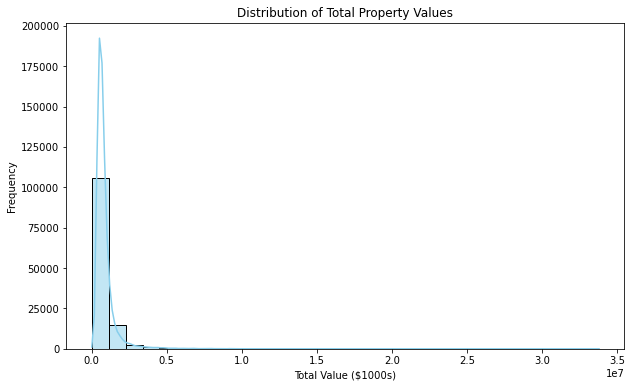

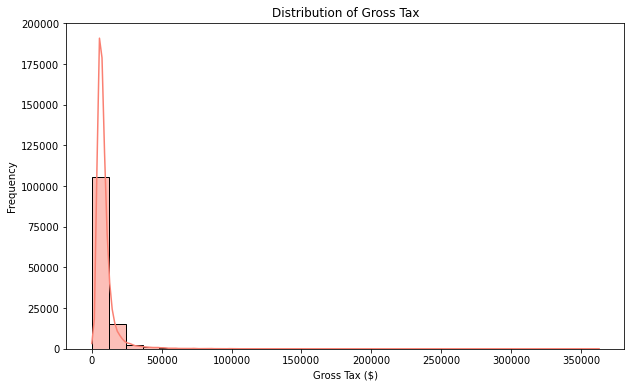

In [9]:
# Histogram for Total Value
plt.figure(figsize=(10, 6), facecolor='white')
sns.histplot(df['TOTAL_VALUE'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Property Values')
plt.xlabel('Total Value ($1000s)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Gross Tax
plt.figure(figsize=(10, 6), facecolor='white')
sns.histplot(df['GROSS_TAX'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Gross Tax')
plt.xlabel('Gross Tax ($)')
plt.ylabel('Frequency')
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Selecting features and target variable
X = df[['LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'YR_BUILT', 'YR_REMODEL']]
y = df['TOTAL_VALUE']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 495054494494.7416
R-squared: 0.2602763285050773


In [11]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)

Random Forest:
Mean Squared Error: 181642467659.82022
R-squared: 0.7285849647444274


In [12]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print("\nK-Nearest Neighbors:")
print("Mean Squared Error:", knn_mse)
print("R-squared:", knn_r2)


K-Nearest Neighbors:
Mean Squared Error: 216338897125.99374
R-squared: 0.6767406314883941


In [13]:
# Support Vector Machine
from sklearn.svm import SVR
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)

print("\nSupport Vector Machine:")
print("Mean Squared Error:", svm_mse)
print("R-squared:", svm_r2)


Support Vector Machine:
Mean Squared Error: 524019797321.9247
R-squared: 0.2169955980167012


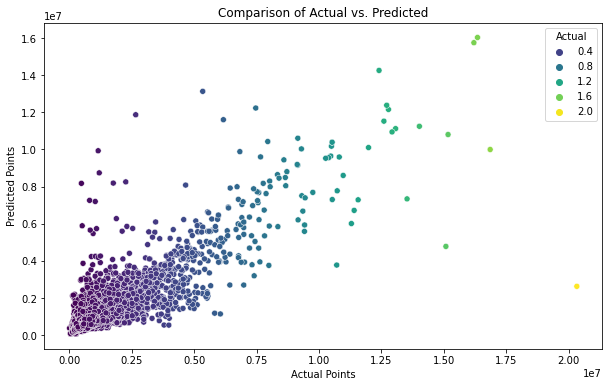

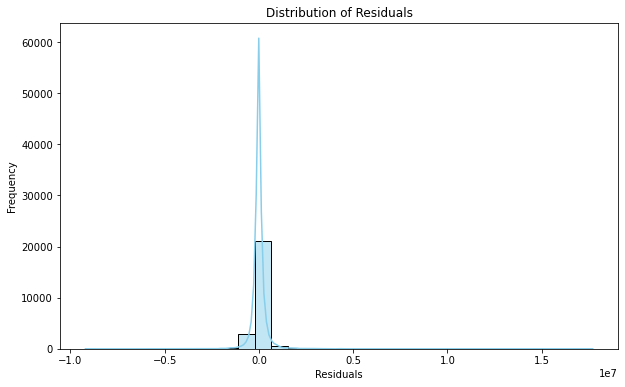

Mean Squared Error: 181642467659.82022
R-squared: 0.7285849647444274


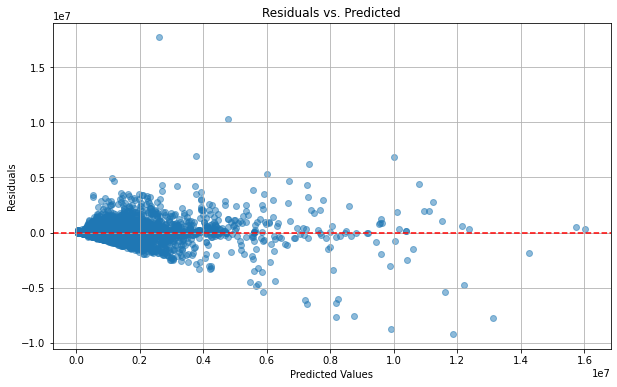

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already imported necessary libraries, loaded the dataset, and preprocessed it

# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(X_test)

# Create a dataframe for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})

# Calculate residuals
comparison_df['Residuals'] = comparison_df['Actual'] - comparison_df['Predicted']

# Scatter plot of Actual vs. Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df, hue='Actual', palette='viridis')
plt.title('Comparison of Actual vs. Predicted')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(comparison_df['Residuals'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(comparison_df['Actual'], comparison_df['Predicted'])
r2 = r2_score(comparison_df['Actual'], comparison_df['Predicted'])

print('Mean Squared Error:', mse)
print('R-squared:', r2)


# Plot Residuals vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Predicted'], comparison_df['Residuals'], alpha=0.5)
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
plt.grid(True)
plt.show()

